<a href="https://colab.research.google.com/github/sckgn/FinalYearProject_ML/blob/main/LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving saudi_prep.csv to saudi_prep.csv
Saving dataset_saudi.csv to dataset_saudi.csv
Saving dataset_2018.csv to dataset_2018.csv


In [2]:
import os 
import pandas as pd
import sklearn
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read in ASDTest dataset
asd_2018_df = pd.read_csv("dataset_2018.csv")

asd_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [3]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'},inplace=True)

In [4]:
mixed_df = asd_2018_df.drop(['Case_No','Qchat-10-Score'],axis=1)
mixed_df.columns
mixed_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,family member,Yes


In [5]:
mixed_df['ASD_Traits'].value_counts()

Yes    728
No     326
Name: ASD_Traits, dtype: int64

<AxesSubplot:>

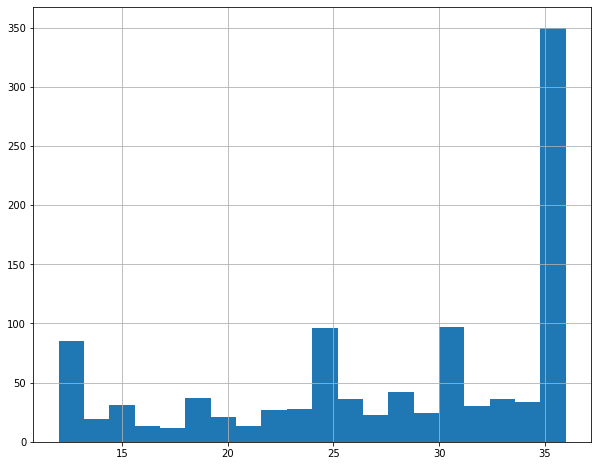

In [6]:
mixed_df['Age_Mons'].hist(bins=20, figsize=(10,8))

In [7]:
mixed_df.shape 

(1054, 17)

In [8]:
features=list(mixed_df)
print(features)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'ASD_Traits']


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder()
scaler = StandardScaler()

age = ['Age_Mons']
char_vals = ['ASD_Traits','Sex', 'Jaundice', 'Family_mem_with_ASD','Who completed the test', 'Ethnicity']
target = ['ASD_Traits']

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [11]:
def preprocess(age, char_vals, target, dataframe):
  dataframe[age] = scaler.fit_transform(dataframe[age].values.reshape(-1,1)) 

  for c in char_vals:
      dataframe[c] = encoder.fit_transform(dataframe[c].values.reshape(-1,1)).toarray()
  print(dataframe.dtypes)
  print(dataframe.head())

In [12]:
preprocess(age, char_vals, target, mixed_df)

A1                          int64
A2                          int64
A3                          int64
A4                          int64
A5                          int64
A6                          int64
A7                          int64
A8                          int64
A9                          int64
A10                         int64
Age_Mons                  float64
Sex                       float64
Ethnicity                 float64
Jaundice                  float64
Family_mem_with_ASD       float64
Who completed the test    float64
ASD_Traits                float64
dtype: object
   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  Ethnicity  \
0   0   0   0   0   0   0   1   1   0    1  0.016652  1.0        0.0   
1   1   1   0   0   0   1   1   0   0    0  1.019590  0.0        0.0   
2   1   0   0   0   0   0   1   1   0    1  1.019590  0.0        0.0   
3   1   1   1   1   1   1   1   1   1    1 -0.484817  0.0        1.0   
4   1   1   0   1   1   1   1   1   1    1 -0.98

In [13]:
from sklearn.model_selection import train_test_split

X_mixed, y_mixed = train_test_split(mixed_df, test_size=0.3, random_state=42)

mixed_training = X_mixed.drop("ASD_Traits", axis=1)
mixed_class = X_mixed["ASD_Traits"] 

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(mixed_training, mixed_class)


LogisticRegression()

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def display_results(model, predictors, targets):
  predictions = model.predict(predictors)
  mse = mean_squared_error(targets, predictions)
  rmse = np.sqrt(mse)

  print("Root mean squared eror: ", rmse)
  print("MSE: ", mse)
  print("R2 Score: ", r2_score(targets, predictions))

In [16]:
display_results(log_reg, mixed_training, mixed_class)

Root mean squared eror:  0.0
MSE:  0.0
R2 Score:  1.0


In [17]:
mixed_test = y_mixed.drop("ASD_Traits", axis=1)
test_class = y_mixed["ASD_Traits"]

In [18]:
from sklearn.metrics import accuracy_score

test_pred = log_reg.predict(mixed_test)

accuracy_score(test_class, test_pred)

1.0

**Logistic Regression with L1 penalty - Mixed dataset**

In [19]:
log_1_pen = LogisticRegression(penalty='l1', solver='liblinear')
log_1_pen.fit(mixed_training, mixed_class)

LogisticRegression(penalty='l1', solver='liblinear')

In [20]:
display_results(log_1_pen, mixed_training, mixed_class)

Root mean squared eror:  0.0
MSE:  0.0
R2 Score:  1.0


In [21]:
from sklearn.model_selection import cross_validate




In [22]:
def cross_validation_results(model, predictors, target, metrics,cv):
  results = cross_validate(model, predictors, target, scoring = metrics, return_train_score=False, cv=10)

  print("Mean Test R2: ", results['test_r2'].mean())
  rmse = np.sqrt(-results['test_neg_mean_squared_error']).mean()
  print("Mean Test MSE: ", -results['test_neg_mean_squared_error'].mean())
  print("Test std: ",np.sqrt(-results['test_neg_mean_squared_error']).std() )
  print("RMSE Test: ", rmse)

In [23]:
metrics =['r2','neg_mean_squared_error']

In [24]:
cross_validation_results(log_1_pen, mixed_training, mixed_class, metrics, 10)

Mean Test R2:  0.9936913895993179
Mean Test MSE:  0.0013513513513513514
Test std:  0.03487429162314579
RMSE Test:  0.011624763874381928


**Feature importance ( Coefficients )**

In [25]:
coef = np.abs(log_reg.coef_)
sorted(zip(coef[0], np.array(features)), reverse=True)

[(2.724588585055358, 'A9'),
 (2.652600455077947, 'A2'),
 (2.5143513715426105, 'A8'),
 (2.423752735567928, 'A4'),
 (2.4038818214948163, 'A5'),
 (2.2982497286027597, 'A7'),
 (2.290122022180208, 'A6'),
 (2.1840290966852542, 'A1'),
 (2.114714605894116, 'A10'),
 (1.8609949723921262, 'A3'),
 (0.6142362566998988, 'Jaundice'),
 (0.3013743796583468, 'Sex'),
 (0.15134210971533232, 'Ethnicity'),
 (0.11598289693088547, 'Family_mem_with_ASD'),
 (0.10002758770757855, 'Who completed the test'),
 (0.02743385377498119, 'Age_Mons')]

In [26]:
sorted(zip(log_reg.coef_[0], np.array(features)), reverse=True)

[(0.6142362566998988, 'Jaundice'),
 (0.3013743796583468, 'Sex'),
 (0.15134210971533232, 'Ethnicity'),
 (-0.02743385377498119, 'Age_Mons'),
 (-0.10002758770757855, 'Who completed the test'),
 (-0.11598289693088547, 'Family_mem_with_ASD'),
 (-1.8609949723921262, 'A3'),
 (-2.114714605894116, 'A10'),
 (-2.1840290966852542, 'A1'),
 (-2.290122022180208, 'A6'),
 (-2.2982497286027597, 'A7'),
 (-2.4038818214948163, 'A5'),
 (-2.423752735567928, 'A4'),
 (-2.5143513715426105, 'A8'),
 (-2.652600455077947, 'A2'),
 (-2.724588585055358, 'A9')]

**Log Odds Ratios**

In [27]:
odds_ratios = np.exp(log_reg.coef_)
# print(odds_ratios)
sorted(zip(odds_ratios[0], np.array(features)), reverse=True)

[(1.8482444760415053, 'Jaundice'),
 (1.3517153015343113, 'Sex'),
 (1.163394598603227, 'Ethnicity'),
 (0.9729390366694888, 'Age_Mons'),
 (0.9048124559901891, 'Who completed the test'),
 (0.8904904532870008, 'Family_mem_with_ASD'),
 (0.15551781742864346, 'A3'),
 (0.12066772249621595, 'A10'),
 (0.11258699168964126, 'A1'),
 (0.10125410585329443, 'A6'),
 (0.10043447756790276, 'A7'),
 (0.0903664849982942, 'A5'),
 (0.08858854350292104, 'A4'),
 (0.08091537920666347, 'A8'),
 (0.07046772643243054, 'A2'),
 (0.06557317495339697, 'A9')]

In [28]:
from sklearn.feature_selection import RFE

selector = RFE(log_reg, n_features_to_select=1)
selector = selector.fit(mixed_training, mixed_class)

In [29]:
order = selector.ranking_
order

array([ 6,  3, 10,  4,  2,  8,  7,  5,  1,  9, 16, 12, 13, 11, 14, 15])

In [30]:
feature_ranks = []

for i in order:
  feature_ranks.append(f"{i}. {features[i-1]}")
feature_ranks

['6. A6',
 '3. A3',
 '10. A10',
 '4. A4',
 '2. A2',
 '8. A8',
 '7. A7',
 '5. A5',
 '1. A1',
 '9. A9',
 '16. Who completed the test',
 '12. Sex',
 '13. Ethnicity',
 '11. Age_Mons',
 '14. Jaundice',
 '15. Family_mem_with_ASD']

In [31]:
selector.score(mixed_training, mixed_class)

0.7598371777476255

In [32]:
cross_validation_results(log_reg,mixed_training, mixed_class,metrics, 10)

Mean Test R2:  0.9936913895993179
Mean Test MSE:  0.0013513513513513514
Test std:  0.03487429162314579
RMSE Test:  0.011624763874381928


**Female Dataset**

In [33]:
females = asd_2018_df[asd_2018_df['Sex']=='f']
females = females.drop(['Case_No','Qchat-10-Score'], axis=1)
females.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 1049
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      319 non-null    int64 
 1   A2                      319 non-null    int64 
 2   A3                      319 non-null    int64 
 3   A4                      319 non-null    int64 
 4   A5                      319 non-null    int64 
 5   A6                      319 non-null    int64 
 6   A7                      319 non-null    int64 
 7   A8                      319 non-null    int64 
 8   A9                      319 non-null    int64 
 9   A10                     319 non-null    int64 
 10  Age_Mons                319 non-null    int64 
 11  Sex                     319 non-null    object
 12  Ethnicity               319 non-null    object
 13  Jaundice                319 non-null    object
 14  Family_mem_with_ASD     319 non-null    object
 15  Who c

In [34]:
preprocess(age,char_vals, target, females)

A1                          int64
A2                          int64
A3                          int64
A4                          int64
A5                          int64
A6                          int64
A7                          int64
A8                          int64
A9                          int64
A10                         int64
Age_Mons                  float64
Sex                       float64
Ethnicity                 float64
Jaundice                  float64
Family_mem_with_ASD       float64
Who completed the test    float64
ASD_Traits                float64
dtype: object
    A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  Ethnicity  \
0    0   0   0   0   0   0   1   1   0    1  0.197673  1.0        0.0   
4    1   1   0   1   1   1   1   1   1    1 -0.736515  1.0        0.0   
12   0   0   0   0   0   0   0   0   0    0 -0.152647  1.0        0.0   
13   1   1   1   1   0   0   1   0   1    1 -1.320382  1.0        0.0   
17   1   1   1   0   1   1   1   1   0    1

In [35]:
X_fem, y_fem = train_test_split(females, test_size=0.3, random_state=42)

fem_train = X_fem.drop("ASD_Traits", axis=1)
fem_class = X_fem["ASD_Traits"]

In [36]:
f_log_reg = LogisticRegression()

f_log_reg.fit(fem_train, fem_class)

LogisticRegression()

**Feature importance**

In [37]:
coef = np.abs(f_log_reg.coef_)
sorted(zip(coef[0], np.array(features)), reverse=True)

[(1.8558991590981229, 'A8'),
 (1.7764349932000678, 'A1'),
 (1.6776398586990746, 'A3'),
 (1.6644636446840795, 'A5'),
 (1.5139283259224237, 'A6'),
 (1.4959969725194207, 'A2'),
 (1.4692997545901227, 'A4'),
 (1.1727055267157394, 'A9'),
 (1.1401879818292693, 'A7'),
 (1.0460779197262287, 'A10'),
 (0.2870601486274753, 'Family_mem_with_ASD'),
 (0.15737619579734372, 'Age_Mons'),
 (0.09792130460901596, 'Ethnicity'),
 (0.09726287097519133, 'Jaundice'),
 (0.06379536281370497, 'Who completed the test'),
 (2.7319617837089605e-05, 'Sex')]

In [38]:
display_results(f_log_reg, fem_train, fem_class)

Root mean squared eror:  0.0
MSE:  0.0
R2 Score:  1.0


In [39]:
cross_validation_results(f_log_reg, fem_train, fem_class, metrics, 10)

Mean Test R2:  0.9629426129426129
Mean Test MSE:  0.008893280632411068
Test std:  0.08434953538829475
RMSE Test:  0.042171513041268524


**Accuracy of model trained on female data only**

Accuracy is calculated for the mixed dataset features and targets.

In [40]:
fem_pred = f_log_reg.predict(mixed_test)

X_fem_test = y_fem.drop("ASD_Traits", axis=1) 
y_fem_test = y_fem["ASD_Traits"]

accuracy_score(test_class, fem_pred)

0.9905362776025236

**3 False positives**

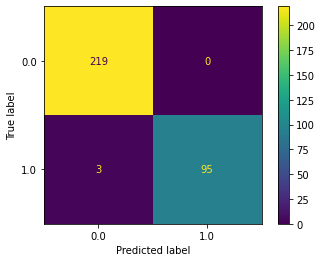

In [103]:
# cm_f_predict_mixed = confusion_matrix(test_class, fem_pred)
display_cm_f_predict_mixed = ConfusionMatrixDisplay.from_estimator(f_log_reg,mixed_test,test_class)

Accuracy calculated for female only data

In [42]:
f_pred = f_log_reg.predict(X_fem_test)

accuracy_score(y_fem_test,f_pred)

0.9791666666666666

**2 False Negative**

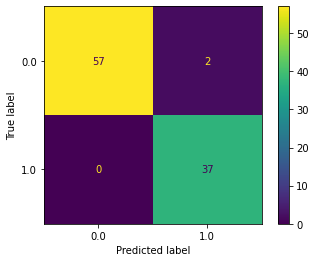

In [105]:
# cm_f = confusion_matrix(y_fem_test, f_pred)
display_cm_f = ConfusionMatrixDisplay.from_estimator(f_log_reg,X_fem_test,y_fem_test)

In [44]:
mixed_pred_f = log_reg.predict(X_fem_test)
accuracy_score(y_fem_test, mixed_pred_f)

1.0

**Male dataset**

In [45]:
males = asd_2018_df[asd_2018_df['Sex']=='m']
males = males.drop(['Case_No','Qchat-10-Score'], axis=1)
males.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 1 to 1053
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      735 non-null    int64 
 1   A2                      735 non-null    int64 
 2   A3                      735 non-null    int64 
 3   A4                      735 non-null    int64 
 4   A5                      735 non-null    int64 
 5   A6                      735 non-null    int64 
 6   A7                      735 non-null    int64 
 7   A8                      735 non-null    int64 
 8   A9                      735 non-null    int64 
 9   A10                     735 non-null    int64 
 10  Age_Mons                735 non-null    int64 
 11  Sex                     735 non-null    object
 12  Ethnicity               735 non-null    object
 13  Jaundice                735 non-null    object
 14  Family_mem_with_ASD     735 non-null    object
 15  Who c

In [46]:
preprocess(age, char_vals, target, males)

A1                          int64
A2                          int64
A3                          int64
A4                          int64
A5                          int64
A6                          int64
A7                          int64
A8                          int64
A9                          int64
A10                         int64
Age_Mons                  float64
Sex                       float64
Ethnicity                 float64
Jaundice                  float64
Family_mem_with_ASD       float64
Who completed the test    float64
ASD_Traits                float64
dtype: object
   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  Ethnicity  \
1   1   1   0   0   0   1   1   0   0    0  0.979862  1.0        0.0   
2   1   0   0   0   0   0   1   1   0    1  0.979862  1.0        0.0   
3   1   1   1   1   1   1   1   1   1    1 -0.597215  1.0        1.0   
5   1   1   0   0   1   1   1   1   1    1 -0.991485  1.0        0.0   
6   1   0   0   1   1   1   0   0   1    0  0.58

In [47]:
X_m, y_m = train_test_split(males, test_size=0.3, random_state=42)

m_train = X_m.drop("ASD_Traits", axis=1)
m_class = X_m["ASD_Traits"]

In [48]:
m_log_reg = LogisticRegression()

m_log_reg.fit(m_train, m_class)

LogisticRegression()

In [49]:
coef = np.abs(m_log_reg.coef_)
sorted(zip(coef[0], np.array(features)), reverse=True)

[(2.6441942916461447, 'A9'),
 (2.298911232471688, 'A2'),
 (2.281801463461055, 'A7'),
 (2.1256282731441356, 'A6'),
 (2.0003394999799626, 'A8'),
 (1.9367376981616649, 'A5'),
 (1.8906024171427545, 'A10'),
 (1.7754641244234464, 'A1'),
 (1.7162104877244027, 'A3'),
 (1.667106984500729, 'A4'),
 (0.346770147460475, 'Jaundice'),
 (0.2662128999826246, 'Family_mem_with_ASD'),
 (0.10639772860127325, 'Ethnicity'),
 (0.054521175723174095, 'Who completed the test'),
 (0.037885990998283374, 'Age_Mons'),
 (0.0001852091062737729, 'Sex')]

**Saudi Mixed**

In [50]:
saudi_df = pd.read_csv("saudi_prep.csv")

In [51]:
saudi_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,0,0,0,0,0,1,1,1,0,0,32,Female,No,Family member,0
1,0,0,1,0,1,0,0,1,0,0,30,Female,No,Family member,0
2,0,0,0,0,0,0,1,0,0,0,36,Male,No,Family member,0
3,0,0,0,0,0,0,0,0,0,0,36,Female,Yes,Family member,0
4,0,0,0,0,0,0,0,0,0,0,36,Female,No,Family member,0


In [52]:
saudi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      506 non-null    int64 
 1   A2                      506 non-null    int64 
 2   A3                      506 non-null    int64 
 3   A4                      506 non-null    int64 
 4   A5                      506 non-null    int64 
 5   A6                      506 non-null    int64 
 6   A7                      506 non-null    int64 
 7   A8                      506 non-null    int64 
 8   A9                      506 non-null    int64 
 9   A10                     506 non-null    int64 
 10  Age_Mons                506 non-null    int64 
 11  Sex                     506 non-null    object
 12  Family_mem_with_ASD     506 non-null    object
 13  Who completed the test  506 non-null    object
 14  ASD_Traits              506 non-null    int64 
dtypes: int

In [53]:
chars = ['ASD_Traits','Sex', 'Family_mem_with_ASD','Who completed the test']

In [54]:
preprocess(age, chars, target, saudi_df)

A1                          int64
A2                          int64
A3                          int64
A4                          int64
A5                          int64
A6                          int64
A7                          int64
A8                          int64
A9                          int64
A10                         int64
Age_Mons                  float64
Sex                       float64
Family_mem_with_ASD       float64
Who completed the test    float64
ASD_Traits                float64
dtype: object
   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  \
0   0   0   0   0   0   1   1   1   0    0  0.905853  1.0   
1   0   0   1   0   1   0   0   1   0    0  0.665936  1.0   
2   0   0   0   0   0   0   1   0   0    0  1.385687  0.0   
3   0   0   0   0   0   0   0   0   0    0  1.385687  1.0   
4   0   0   0   0   0   0   0   0   0    0  1.385687  1.0   

   Family_mem_with_ASD  Who completed the test  ASD_Traits  
0                  1.0                     1.0  

In [55]:
X_saudi, y_saudi = train_test_split(saudi_df, test_size=0.3, random_state=42)

saudi_train = X_saudi.drop("ASD_Traits", axis=1)
saudi_class = X_saudi["ASD_Traits"]
saudi_test = y_saudi.drop("ASD_Traits", axis=1)
saudi_test_class = y_saudi["ASD_Traits"]

In [56]:
saudi_log = LogisticRegression()

saudi_log.fit(saudi_train, saudi_class)

LogisticRegression()

In [57]:
display_results(saudi_log, saudi_train, saudi_class)

Root mean squared eror:  0.053149400345273386
MSE:  0.002824858757062147
R2 Score:  0.9870614035087719


In [58]:
cross_validation_results(saudi_log, saudi_train, saudi_class, metrics, 10)

Mean Test R2:  0.9484848484848485
Mean Test MSE:  0.011269841269841268
Test std:  0.08940728964420293
RMSE Test:  0.057237905520021205


In [59]:
saudi_pred = saudi_log.predict(saudi_test)
accuracy_score(saudi_test_class, saudi_pred)

0.993421052631579

**New mixed dataset ( 2018 dataset )**

Training a new logistic regression model with features matching the saudi arabian dataset.

In [60]:
new_mixed = mixed_df.copy()
new_mixed = new_mixed.drop(['Ethnicity','Jaundice'], axis=1)
new_mixed

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,0.016652,1.0,1.0,0.0,1.0
1,1,1,0,0,0,1,1,0,0,0,1.019590,0.0,1.0,0.0,0.0
2,1,0,0,0,0,0,1,1,0,1,1.019590,0.0,1.0,0.0,0.0
3,1,1,1,1,1,1,1,1,1,1,-0.484817,0.0,1.0,0.0,0.0
4,1,1,0,1,1,1,1,1,1,1,-0.986286,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,-0.484817,1.0,0.0,0.0,1.0
1050,0,0,1,1,1,0,1,0,1,0,-1.989223,0.0,1.0,0.0,0.0
1051,1,0,1,1,1,1,1,1,1,1,-1.237020,0.0,1.0,0.0,0.0
1052,1,0,0,0,0,0,0,1,0,1,-1.111653,0.0,0.0,0.0,1.0


In [61]:
new_mixed.drop(labels=range(506,1054), axis=0)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,0.016652,1.0,1.0,0.0,1.0
1,1,1,0,0,0,1,1,0,0,0,1.019590,0.0,1.0,0.0,0.0
2,1,0,0,0,0,0,1,1,0,1,1.019590,0.0,1.0,0.0,0.0
3,1,1,1,1,1,1,1,1,1,1,-0.484817,0.0,1.0,0.0,0.0
4,1,1,0,1,1,1,1,1,1,1,-0.986286,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,1,0,0,1,0,0,0,0,1,1.019590,0.0,1.0,0.0,0.0
502,0,1,1,1,1,1,1,0,1,1,-1.989223,0.0,0.0,0.0,0.0
503,1,1,0,1,1,1,0,1,1,0,1.019590,0.0,1.0,0.0,0.0
504,1,0,1,0,1,0,0,0,0,0,1.019590,0.0,1.0,0.0,1.0


In [62]:
preprocess(age, chars, target, new_mixed)

A1                          int64
A2                          int64
A3                          int64
A4                          int64
A5                          int64
A6                          int64
A7                          int64
A8                          int64
A9                          int64
A10                         int64
Age_Mons                  float64
Sex                       float64
Family_mem_with_ASD       float64
Who completed the test    float64
ASD_Traits                float64
dtype: object
   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  \
0   0   0   0   0   0   0   1   1   0    1  0.016652  0.0   
1   1   1   0   0   0   1   1   0   0    0  1.019590  1.0   
2   1   0   0   0   0   0   1   1   0    1  1.019590  1.0   
3   1   1   1   1   1   1   1   1   1    1 -0.484817  1.0   
4   1   1   0   1   1   1   1   1   1    1 -0.986286  0.0   

   Family_mem_with_ASD  Who completed the test  ASD_Traits  
0                  0.0                     1.0  

In [63]:
new_log_reg = LogisticRegression()

new_feat = new_mixed.drop(['ASD_Traits'], axis=1)
new_class = new_mixed["ASD_Traits"]

new_log_reg.fit(new_feat, new_class)

LogisticRegression()

**Three year old data - Logistic Regression**

In [64]:
three_y_old = asd_2018_df[asd_2018_df['Age_Mons'] > 24]
three_y_old['Age_Mons'].value_counts()

36    320
30     67
28     42
33     36
26     36
34     34
35     30
32     30
31     30
25     26
29     24
27     23
Name: Age_Mons, dtype: int64

In [65]:
three_y_old = three_y_old.drop(['Case_No','Qchat-10-Score'], axis=1)

In [66]:
preprocess(age, char_vals, target, three_y_old)

A1                          int64
A2                          int64
A3                          int64
A4                          int64
A5                          int64
A6                          int64
A7                          int64
A8                          int64
A9                          int64
A10                         int64
Age_Mons                  float64
Sex                       float64
Ethnicity                 float64
Jaundice                  float64
Family_mem_with_ASD       float64
Who completed the test    float64
ASD_Traits                float64
dtype: object
   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  Ethnicity  \
0   0   0   0   0   0   0   1   1   0    1 -1.304084  1.0        0.0   
1   1   1   0   0   0   1   1   0   0    0  0.870298  0.0        0.0   
2   1   0   0   0   0   0   1   1   0    1  0.870298  0.0        0.0   
6   1   0   0   1   1   1   0   0   1    0  0.054905  0.0        0.0   
7   0   1   0   0   1   0   1   1   1    1  0.05

In [67]:
three_y_log_reg = LogisticRegression()
three_feat = three_y_old.drop(['ASD_Traits'], axis=1)
three_target = three_y_old['ASD_Traits']

three_y_log_reg.fit(three_feat, three_target)

LogisticRegression()

In [68]:
display_results(three_y_log_reg, three_feat, three_target)

Root mean squared eror:  0.0
MSE:  0.0
R2 Score:  1.0


In [69]:
cross_validation_results(three_y_log_reg, three_feat, three_target, metrics, 10)

Mean Test R2:  1.0
Mean Test MSE:  -0.0
Test std:  0.0
RMSE Test:  0.0


**Two year old data - Logistic Regression**

In [70]:
two_y_old = asd_2018_df[asd_2018_df['Age_Mons'] <= 24]
two_y_old['Age_Mons'].value_counts()

24    70
12    67
15    31
23    28
22    27
20    21
19    21
14    19
13    18
18    16
21    13
16    13
17    12
Name: Age_Mons, dtype: int64

In [71]:
two_y_old = two_y_old.drop(['Case_No','Qchat-10-Score'], axis=1)

In [72]:
preprocess(age, char_vals, target, two_y_old)

A1                          int64
A2                          int64
A3                          int64
A4                          int64
A5                          int64
A6                          int64
A7                          int64
A8                          int64
A9                          int64
A10                         int64
Age_Mons                  float64
Sex                       float64
Ethnicity                 float64
Jaundice                  float64
Family_mem_with_ASD       float64
Who completed the test    float64
ASD_Traits                float64
dtype: object
    A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  Ethnicity  \
3    1   1   1   1   1   1   1   1   1    1  1.274957  0.0        1.0   
4    1   1   0   1   1   1   1   1   1    1  0.395761  1.0        0.0   
5    1   1   0   0   1   1   1   1   1    1  0.615560  0.0        0.0   
9    1   1   1   0   1   1   0   1   1    1  0.835359  0.0        0.0   
11   1   1   1   1   0   1   1   1   0    1

In [73]:
two_y_log_reg = LogisticRegression()
two_feat = two_y_old.drop(['ASD_Traits'], axis=1)
two_target = two_y_old['ASD_Traits']

two_y_log_reg.fit(two_feat, two_target)

LogisticRegression()

In [74]:
display_results(two_y_log_reg, two_feat, two_target)

Root mean squared eror:  0.0
MSE:  0.0
R2 Score:  1.0


In [75]:
cross_validation_results(two_y_log_reg, two_feat, two_target, metrics, 10)

Mean Test R2:  0.9494565217391304
Mean Test MSE:  0.011349206349206348
Test std:  0.08969898793149975
RMSE Test:  0.057474323947924864


**Dataset general population representation**

The available dataset has a 2.3:1 male to female ratio.

In [76]:
asd_2018_df['Sex'].value_counts()

m    735
f    319
Name: Sex, dtype: int64

**Dataset - 50/50 female/male ratio, equal number of ASD/No ASD Traits**

In [77]:
f_only = asd_2018_df[asd_2018_df['Sex']=='f']
f_only.info()
f_only['ASD_Traits'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 1049
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 319 non-null    int64 
 1   A1                      319 non-null    int64 
 2   A2                      319 non-null    int64 
 3   A3                      319 non-null    int64 
 4   A4                      319 non-null    int64 
 5   A5                      319 non-null    int64 
 6   A6                      319 non-null    int64 
 7   A7                      319 non-null    int64 
 8   A8                      319 non-null    int64 
 9   A9                      319 non-null    int64 
 10  A10                     319 non-null    int64 
 11  Age_Mons                319 non-null    int64 
 12  Qchat-10-Score          319 non-null    int64 
 13  Sex                     319 non-null    object
 14  Ethnicity               319 non-null    object
 15  Jaund

Yes    194
No     125
Name: ASD_Traits, dtype: int64

In [78]:
y_male = asd_2018_df[(asd_2018_df['Sex']=='m') & (asd_2018_df['ASD_Traits']=='Yes')].head(194)
y_male.info()
y_male['ASD_Traits'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 1 to 405
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 194 non-null    int64 
 1   A1                      194 non-null    int64 
 2   A2                      194 non-null    int64 
 3   A3                      194 non-null    int64 
 4   A4                      194 non-null    int64 
 5   A5                      194 non-null    int64 
 6   A6                      194 non-null    int64 
 7   A7                      194 non-null    int64 
 8   A8                      194 non-null    int64 
 9   A9                      194 non-null    int64 
 10  A10                     194 non-null    int64 
 11  Age_Mons                194 non-null    int64 
 12  Qchat-10-Score          194 non-null    int64 
 13  Sex                     194 non-null    object
 14  Ethnicity               194 non-null    object
 15  Jaundi

Yes    194
Name: ASD_Traits, dtype: int64

In [79]:
n_male = asd_2018_df[(asd_2018_df['Sex']=='m') & (asd_2018_df['ASD_Traits']=='No')].head(125)
n_male.info()
n_male['ASD_Traits'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 8 to 704
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 125 non-null    int64 
 1   A1                      125 non-null    int64 
 2   A2                      125 non-null    int64 
 3   A3                      125 non-null    int64 
 4   A4                      125 non-null    int64 
 5   A5                      125 non-null    int64 
 6   A6                      125 non-null    int64 
 7   A7                      125 non-null    int64 
 8   A8                      125 non-null    int64 
 9   A9                      125 non-null    int64 
 10  A10                     125 non-null    int64 
 11  Age_Mons                125 non-null    int64 
 12  Qchat-10-Score          125 non-null    int64 
 13  Sex                     125 non-null    object
 14  Ethnicity               125 non-null    object
 15  Jaundi

No    125
Name: ASD_Traits, dtype: int64

In [80]:
equal_male = pd.concat([y_male,n_male], axis=0)
equal_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 1 to 704
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 319 non-null    int64 
 1   A1                      319 non-null    int64 
 2   A2                      319 non-null    int64 
 3   A3                      319 non-null    int64 
 4   A4                      319 non-null    int64 
 5   A5                      319 non-null    int64 
 6   A6                      319 non-null    int64 
 7   A7                      319 non-null    int64 
 8   A8                      319 non-null    int64 
 9   A9                      319 non-null    int64 
 10  A10                     319 non-null    int64 
 11  Age_Mons                319 non-null    int64 
 12  Qchat-10-Score          319 non-null    int64 
 13  Sex                     319 non-null    object
 14  Ethnicity               319 non-null    object
 15  Jaundi

In [81]:
equal_ratio = pd.concat([f_only, equal_male], axis=0)
equal_ratio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 704
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 638 non-null    int64 
 1   A1                      638 non-null    int64 
 2   A2                      638 non-null    int64 
 3   A3                      638 non-null    int64 
 4   A4                      638 non-null    int64 
 5   A5                      638 non-null    int64 
 6   A6                      638 non-null    int64 
 7   A7                      638 non-null    int64 
 8   A8                      638 non-null    int64 
 9   A9                      638 non-null    int64 
 10  A10                     638 non-null    int64 
 11  Age_Mons                638 non-null    int64 
 12  Qchat-10-Score          638 non-null    int64 
 13  Sex                     638 non-null    object
 14  Ethnicity               638 non-null    object
 15  Jaundi

In [82]:
equal_ratio = equal_ratio.drop(['Case_No','Qchat-10-Score'], axis=1)

In [83]:
preprocess(age, char_vals, target, equal_ratio)

A1                          int64
A2                          int64
A3                          int64
A4                          int64
A5                          int64
A6                          int64
A7                          int64
A8                          int64
A9                          int64
A10                         int64
Age_Mons                  float64
Sex                       float64
Ethnicity                 float64
Jaundice                  float64
Family_mem_with_ASD       float64
Who completed the test    float64
ASD_Traits                float64
dtype: object
    A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  Ethnicity  \
0    0   0   0   0   0   0   1   1   0    1 -0.000390  1.0        0.0   
4    1   1   0   1   1   1   1   1   1    1 -0.994756  1.0        0.0   
12   0   0   0   0   0   0   0   0   0    0 -0.373277  1.0        0.0   
13   1   1   1   1   0   0   1   0   1    1 -1.616235  1.0        0.0   
17   1   1   1   0   1   1   1   1   0    1

In [84]:
X_equal, y_equal = train_test_split(equal_ratio, test_size=0.3, random_state=42)

equal_train = X_equal.drop("ASD_Traits", axis=1)
equal_class = X_equal["ASD_Traits"]

In [85]:
equal_log_reg = LogisticRegression()
equal_log_reg.fit(equal_train, equal_class)

LogisticRegression()

In [86]:
display_results(equal_log_reg, equal_train, equal_class)

Root mean squared eror:  0.047351372381037836
MSE:  0.002242152466367713
R2 Score:  0.9905156831472621


In [87]:
cross_validation_results(equal_log_reg,equal_train, equal_class, metrics, 10)

Mean Test R2:  0.9713741051976346
Mean Test MSE:  0.006767676767676768
Test std:  0.07385978178105702
RMSE Test:  0.03622719148555964


**Evaluate on test data**

In [88]:
equal_X_test = y_equal.drop("ASD_Traits", axis=1)
equal_y_test = y_equal['ASD_Traits']

equal_pred = equal_log_reg.predict(equal_X_test)
accuracy_score(equal_y_test,equal_pred)

0.9895833333333334

**2 False Negatives** - 0.0 = ASD, 1.0 = No ASD

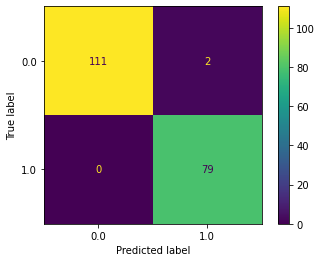

In [100]:
# confusion_matrix = confusion_matrix(equal_y_test, equal_pred)
# confusion_matrix

display = ConfusionMatrixDisplay.from_estimator(equal_log_reg,equal_X_test, equal_y_test)

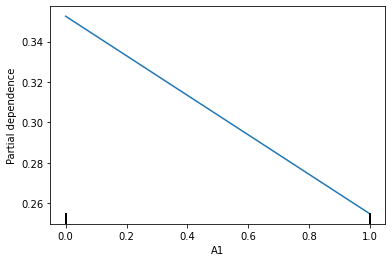

In [91]:
from sklearn.inspection import PartialDependenceDisplay

disp1 = PartialDependenceDisplay.from_estimator(log_reg, mixed_training,[0])

**Feature selection with CHI2 for mixed dataset**

Code adapted from https://stackoverflow.com/questions/51695769/sklearn-chi2-for-feature-selection

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


X_mixed_df = mixed_df.drop("ASD_Traits", axis=1)
y_mixed_df = mixed_df["ASD_Traits"]

scaled_X = scaler.fit_transform(X_mixed_df)

chi2_selector = SelectKBest(chi2, k=5)
chi2_selector.fit(scaled_X, y_mixed_df)

chi2_scores = pd.DataFrame(list(zip(features, chi2_selector.scores_,chi2_selector.pvalues_)), columns=['feature','score','pval'])
chi2_scores

features_chi = list(mixed_df)

kbest = sorted(np.asarray(features_chi[:16])[chi2_selector.get_support()], reverse=True)
kbest

['A9', 'A6', 'A5', 'A4', 'A2']

In [93]:
chi2_scores

,feature,score,pval
0,A1,116.759119,3.241388e-27
1,A2,124.799967,5.629263e-29
2,A3,105.916292,7.691663e-25
3,A4,131.188598,2.251647e-30
4,A5,158.969159,1.900549e-36
5,A6,144.612750,2.609901e-33
6,A7,117.034985,2.820482e-27
7,A8,104.003028,2.020071e-24
8,A9,179.324288,6.807022e-41
9,A10,14.100258,1.733200e-04


In [94]:
X_females = females.drop("ASD_Traits", axis=1)
y_females = females['ASD_Traits']

scaled_X_f = scaler.fit_transform(X_females)
chi2_selector_f = SelectKBest(chi2, k=5)

chi2_selector_f.fit(scaled_X_f, y_females)

chi2_scores_f = pd.DataFrame(list(zip(features, chi2_selector_f.scores_, chi2_selector.pvalues_)), columns=['feature','score','pval'])
chi2_scores_f

,feature,score,pval
0,A1,65.725883,3.241388e-27
1,A2,49.652717,5.629263e-29
2,A3,57.294371,7.691663e-25
3,A4,64.554371,2.251647e-30
4,A5,57.827805,1.900549e-36
5,A6,58.347481,2.609901e-33
6,A7,49.476137,2.820482e-27
7,A8,38.248330,2.020071e-24
8,A9,62.664629,6.807022e-41
9,A10,6.078445,1.733200e-04


In [95]:
kbest_f = sorted(np.asarray(features_chi[:16])[chi2_selector_f.get_support()], reverse=True)
kbest_f

['A9', 'A6', 'A5', 'A4', 'A1']

In [96]:
# import pickle

# pickle.dump(log_reg, open('log_reg.pkl','wb'))